In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [3]:
# Load the uploaded heart disease dataset
data = pd.read_csv('heart_data.csv')

# Display the first few rows to understand the data structure
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [4]:
# Print column names to identify the target column
print(data.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')


In [5]:
# Rename 'target' column to 'has_disease' for clarity
#data.rename(columns={'target': 'has_disease'}, inplace=True)

In [6]:
data.rename(columns={'condition': 'has_disease'}, inplace=True)
X = data.drop(columns=['has_disease'])
y = data['has_disease']

In [7]:
# Split the dataset into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [8]:
# Standardize the feature values for better neural network performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Compute class weights to balance classes during training
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {0: class_weights[0], 1: class_weights[1]}

In [10]:
# Build a simple ANN model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),  # First hidden layer
    Dense(16, activation='relu'),                                   # Second hidden layer
    Dense(1, activation='sigmoid')                                  # Output layer for binary classification
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Compile the model with optimizer, loss, and metrics
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model using class weights
history = model.fit(X_train, y_train, epochs=20, batch_size=32,
                    class_weight=class_weights_dict,
                    validation_split=0.1)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.4276 - loss: 0.7337 - val_accuracy: 0.6667 - val_loss: 0.6399
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4977 - loss: 0.6954 - val_accuracy: 0.7917 - val_loss: 0.6124
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6220 - loss: 0.6541 - val_accuracy: 0.8750 - val_loss: 0.5834
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6988 - loss: 0.6193 - val_accuracy: 0.8750 - val_loss: 0.5548
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7093 - loss: 0.6111 - val_accuracy: 0.8750 - val_loss: 0.5295
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7971 - loss: 0.5623 - val_accuracy: 0.8333 - val_loss: 0.5027
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8083 - loss: 0.5355 - val_accuracy: 0.8750 - val_loss: 0.4775
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8364 - loss: 0.5222 - val_accuracy: 0.8750 - val_loss: 0.4533


In [12]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8799 - loss: 0.3336
Test Accuracy: 0.8667


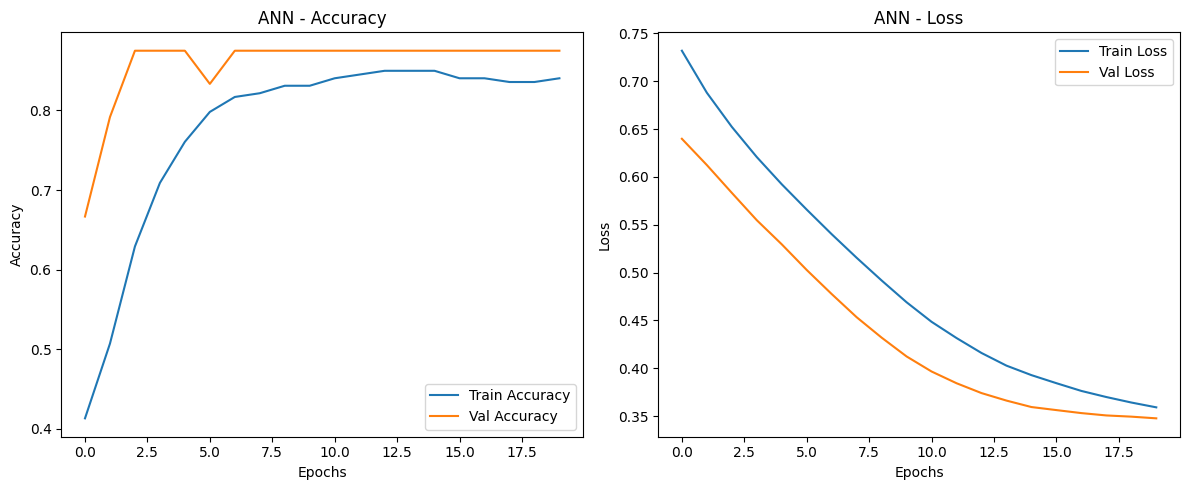

In [14]:
import matplotlib.pyplot as plt
# Plot accuracy and loss for the ANN model
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('ANN - Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('ANN - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

It shows how well the model can distinguish between classes.

The Area Under the Curve (AUC) indicates performance:

*   1.0 = perfect classifier
*   0.5 = random guessing
*   (>) 0.8 = good performance

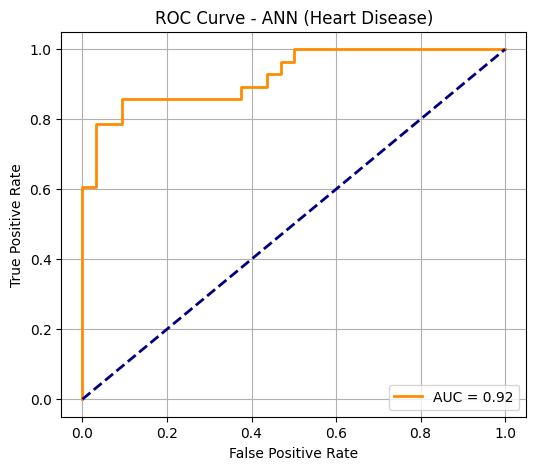

In [16]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - ANN (Heart Disease)')
plt.legend(loc="lower right")
plt.grid()
plt.show()